In [1]:
# TV Series Episode Rating Heatmap (OMDb)


In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display
from tqdm.notebook import tqdm

In [3]:
OMDB_API_KEY = "c82d4fa6"

In [4]:
def fetch_season(series_title, season_num, api_key=OMDB_API_KEY, timeout=10):
    """
    Fetches JSON response for a single season (returns dict or None if not found).
    """
    params = {"t": series_title, "Season": season_num, "apikey": api_key}
    try:
        r = requests.get("http://www.omdbapi.com/", params=params, timeout=timeout)
        r.raise_for_status()
        data = r.json()
        if data.get("Response", "False") == "True" and "Episodes" in data:
            return data
        else:
            return None
    except Exception as e:
        print(f"Error fetching {series_title} S{season_num}: {e}")
        return None


In [5]:
def fetch_all_seasons(series_title, api_key=OMDB_API_KEY, max_seasons=50, delay=0.5, cache=True):
    """
    Loops seasons 1..max_seasons and stops when no season found.
    Returns pandas DataFrame with columns: series, season, episode, title, imdbRating, imdbVotes
    If cache==True and CSV exists, will load from CSV instead of calling API.
    """
    safe_name = "".join(c if c.isalnum() or c in (" ", "_", "-") else "_" for c in series_title).strip()
    csv_cache = f"{safe_name.replace(' ', '_')}_episodes.csv"
    if cache:
        try:
            df_cache = pd.read_csv(csv_cache)
            print(f"Loaded cached file: {csv_cache}")
            return df_cache
        except FileNotFoundError:
            pass

    records = []
    for s in range(1, max_seasons + 1):
        data = fetch_season(series_title, s, api_key)
        if not data:
            # assume no more seasons if not found
            print(f"No data for season {s}. Stopping.")
            break
        # parse episodes
        for ep in data.get("Episodes", []):
            rating = ep.get("imdbRating")
            rating_val = float(rating) if rating and rating != "N/A" else np.nan
            votes = ep.get("imdbVotes")
            records.append({
                "series": series_title,
                "season": int(s),
                "episode": int(ep.get("Episode", 0)),
                "title": ep.get("Title"),
                "imdbRating": rating_val,
                "imdbVotes": votes
            })
        time.sleep(delay)  # be polite to the API
    df = pd.DataFrame(records)
    if cache:
        df.to_csv(csv_cache, index=False)
        print(f"Saved cache to {csv_cache}")
    return df


In [6]:
def fetch_all_seasons(series_title, api_key=OMDB_API_KEY, max_seasons=50, delay=0.5, cache=True):
    """
    Loops seasons 1..max_seasons and stops when no season found.
    Returns pandas DataFrame with columns: series, season, episode, title, imdbRating, imdbVotes
    If cache==True and CSV exists, will load from CSV instead of calling API.
    """
    safe_name = "".join(c if c.isalnum() or c in (" ", "_", "-") else "_" for c in series_title).strip()
    csv_cache = f"{safe_name.replace(' ', '_')}_episodes.csv"
    if cache:
        try:
            df_cache = pd.read_csv(csv_cache)
            print(f"Loaded cached file: {csv_cache}")
            return df_cache
        except FileNotFoundError:
            pass

    records = []
    for s in range(1, max_seasons + 1):
        data = fetch_season(series_title, s, api_key)
        if not data:
            # assume no more seasons if not found
            print(f"No data for season {s}. Stopping.")
            break
        # parse episodes
        for ep in data.get("Episodes", []):
            rating = ep.get("imdbRating")
            rating_val = float(rating) if rating and rating != "N/A" else np.nan
            votes = ep.get("imdbVotes")
            records.append({
                "series": series_title,
                "season": int(s),
                "episode": int(ep.get("Episode", 0)),
                "title": ep.get("Title"),
                "imdbRating": rating_val,
                "imdbVotes": votes
            })
        time.sleep(delay)  # be polite to the API
    df = pd.DataFrame(records)
    if cache:
        df.to_csv(csv_cache, index=False)
        print(f"Saved cache to {csv_cache}")
    return df


In [7]:
series_name = "Game of Thrones"   # replace with any show name
df_eps = fetch_all_seasons(series_name, cache=True)
print("Rows fetched:", len(df_eps))
display(df_eps.head(12))


No data for season 9. Stopping.
Saved cache to Game_of_Thrones_episodes.csv
Rows fetched: 74


,series,season,episode,title,imdbRating,imdbVotes
0,Game of Thrones,1,0,Unaired Original Pilot,NaN,None
1,Game of Thrones,1,1,Winter Is Coming,8.9,None
2,Game of Thrones,1,2,The Kingsroad,8.6,None
3,Game of Thrones,1,3,Lord Snow,8.5,None
4,Game of Thrones,1,4,"Cripples, Bastards, and Broken Things",8.6,None
5,Game of Thrones,1,5,The Wolf and the Lion,9.0,None
6,Game of Thrones,1,6,A Golden Crown,9.1,None
7,Game of Thrones,1,7,You Win or You Die,9.1,None
8,Game of Thrones,1,8,The Pointy End,8.9,None
9,Game of Thrones,1,9,Baelor,9.6,None


In [8]:
# Basic checks and cleaning
print(df_eps.dtypes)
print("Seasons:", df_eps['season'].max(), " Max episode:", df_eps['episode'].max())

# remove duplicates and sort
df_eps = df_eps.drop_duplicates(subset=['season', 'episode']).sort_values(['season','episode']).reset_index(drop=True)
display(df_eps.head())


series         object
season          int64
episode         int64
title          object
imdbRating    float64
imdbVotes      object
dtype: object
Seasons: 8  Max episode: 10


,series,season,episode,title,imdbRating,imdbVotes
0,Game of Thrones,1,0,Unaired Original Pilot,NaN,None
1,Game of Thrones,1,1,Winter Is Coming,8.9,None
2,Game of Thrones,1,2,The Kingsroad,8.6,None
3,Game of Thrones,1,3,Lord Snow,8.5,None
4,Game of Thrones,1,4,"Cripples, Bastards, and Broken Things",8.6,None


In [9]:
# Pivot: rows = episode number, cols = season number
pivot = df_eps.pivot(index='episode', columns='season', values='imdbRating')
pivot = pivot.sort_index()
pivot.head()


season,1,2,3,4,5,6,7,8
episode,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.9,8.6,8.6,9.0,8.3,8.4,8.5,7.6
2,8.6,8.3,8.4,9.7,8.3,9.2,8.8,7.9
3,8.5,NaN,8.7,8.7,NaN,8.6,9.1,7.5
4,8.6,NaN,9.5,8.7,8.5,9.0,9.7,5.5


In [10]:
def rating_category(r):
    if pd.isna(r): return "NoData"
    r = float(r)
    if r >= 9.0: return "Awesome"
    if r >= 8.0: return "Great"
    if r >= 7.0: return "Good"
    if r >= 6.0: return "Regular"
    if r >= 5.0: return "Bad"
    return "Garbage"

categories = ["Awesome","Great","Good","Regular","Bad","Garbage","NoData"]
colors = {
    "Awesome": "#006400",
    "Great":   "#2E8B57",
    "Good":    "#9ACD32",
    "Regular": "#FFDA6B",
    "Bad":     "#FF6B6B",
    "Garbage": "#6B1B1B",
    "NoData":  "#EEEEEE"
}

cat_grid = pivot.applymap(rating_category)
cat_grid.head()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6560\1072507228.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cat_grid = pivot.applymap(rating_category)


season,1,2,3,4,5,6,7,8
episode,,,,,,,,
0,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData
1,Great,Great,Great,Awesome,Great,Great,Great,Good
2,Great,Great,Great,Awesome,Great,Awesome,Great,Good
3,Great,NoData,Great,Great,NoData,Great,Awesome,Good
4,Great,NoData,Awesome,Great,Great,Awesome,Awesome,Bad


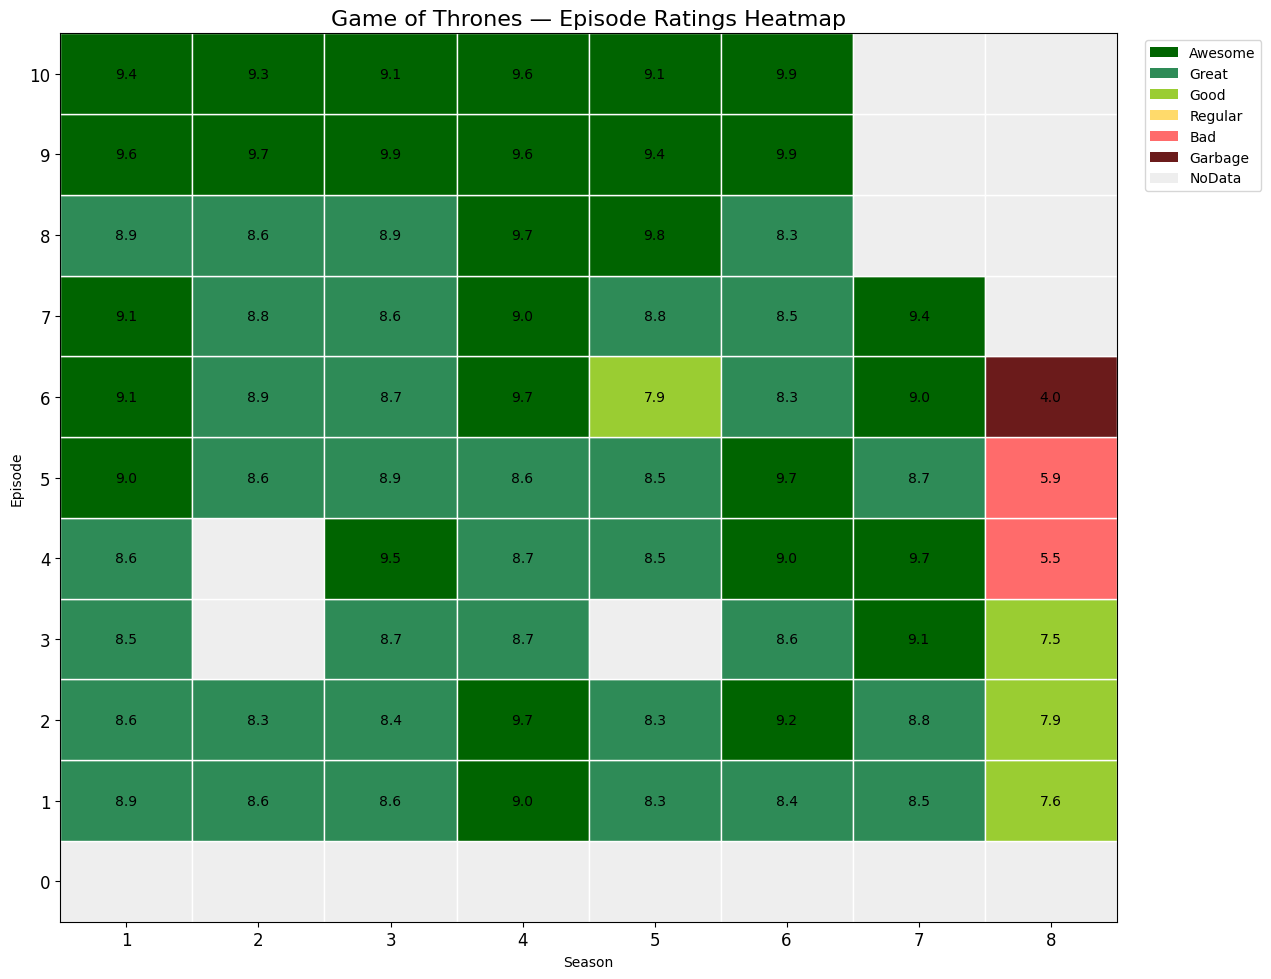

In [11]:
fig, ax = plt.subplots(figsize=(1.6 * max(4, pivot.shape[1]), 0.9 * max(6, pivot.shape[0])))

for i, epi in enumerate(cat_grid.index):
    for j, seas in enumerate(cat_grid.columns):
        cat = cat_grid.loc[epi, seas]
        face = colors.get(cat, "#FFFFFF")
        ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=face, edgecolor='white'))
        val = pivot.loc[epi, seas]
        if not pd.isna(val):
            ax.text(j + 0.5, i + 0.5, f"{val:.1f}", ha='center', va='center', fontsize=10)

ax.set_xticks(np.arange(len(pivot.columns)) + 0.5)
ax.set_xticklabels(pivot.columns, rotation=0, fontsize=12)
ax.set_yticks(np.arange(len(pivot.index)) + 0.5)
ax.set_yticklabels(pivot.index, rotation=0, fontsize=12)
ax.set_xlabel("Season")
ax.set_ylabel("Episode")
ax.set_title(f"{series_name} — Episode Ratings Heatmap", fontsize=16)
ax.invert_yaxis()
ax.set_xlim(0, len(pivot.columns))
ax.set_ylim(0, len(pivot.index))

from matplotlib.patches import Patch
legend_handles = [Patch(facecolor=colors[c], label=c) for c in ["Awesome","Great","Good","Regular","Bad","Garbage","NoData"]]
ax.legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [12]:
safe = series_name.replace(" ", "_")
pivot.to_csv(f"{safe}_episodes_pivot.csv")
fig.savefig(f"{safe}_episode_heatmap.png", dpi=200, bbox_inches='tight')
print("Saved:", f"{safe}_episodes_pivot.csv", f"{safe}_episode_heatmap.png")


Saved: Game_of_Thrones_episodes_pivot.csv Game_of_Thrones_episode_heatmap.png


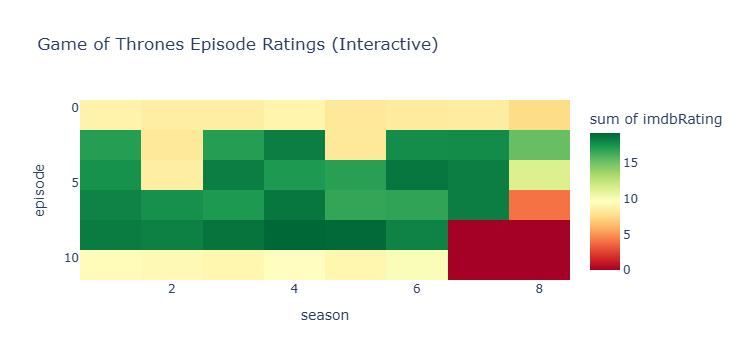

Interactive HTML saved.


In [13]:
import plotly.express as px

# build a DataFrame suitable for plotly (season, episode, rating, title)
df_plotly = df_eps.copy()
df_plotly['rating_text'] = df_plotly['imdbRating'].apply(lambda x: f"{x:.1f}" if not pd.isna(x) else "N/A")

fig_p = px.density_heatmap(df_plotly, x='season', y='episode', z='imdbRating',
                           hover_data=['title','imdbRating'],
                           color_continuous_scale='RdYlGn',
                           nbinsx=len(df_plotly['season'].unique()),
                           title=f"{series_name} Episode Ratings (Interactive)")
fig_p.update_yaxes(autorange='reversed')
fig_p.show()

# Save interactive HTML
fig_p.write_html(f"{safe}_interactive_heatmap.html")
print("Interactive HTML saved.")
